In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.rcParams.update({'font.size': 8})
plt.rc('grid', linestyle="--", color='black', alpha=0.2)

def dataload(filename):
    data = np.genfromtxt(filename, delimiter="\t")
    x = data[:,0]
    y = data[:,1]
    return x, y

def plotter(x, y, xlims, ylims, title, x_coeff = 6, y_coeff = 4.5, dpi = 100):
    fig, ax = plt.subplots(dpi=dpi)

    N = len(xlims)
    for i in range(N):
        sub = inset_axes(ax, width=2, height=0.9, bbox_to_anchor=[x_coeff*dpi, dpi*(y_coeff - 1.10*(i))])
        mark_inset(ax, sub, loc1=4, loc2=3, ec="r", alpha = 0.3, zorder = -1)
        sub.plot(x, y, lw=0.5, c='black')
        sub.set_ylim(0, ylims[i])
        sub.set_xlim(xlims[i][0], xlims[i][1])
        sub.invert_xaxis()

    ax.plot(x, y, lw=0.5, c="black")
    ax.set_xlim(-1, 10.5)
    ax.invert_xaxis()
    ax.set_ylabel("Intensidad (u.a)")
    ax.set_xlabel("$\delta$ (ppm)")
    plt.suptitle(title, fontsize=12)
    
    return fig, ax

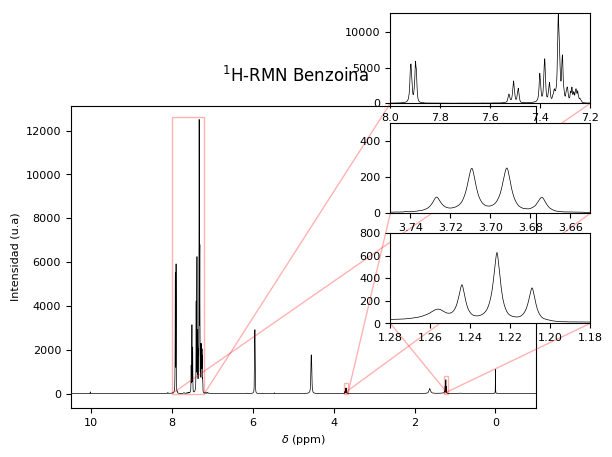

In [2]:
x, y = dataload("benzoina.txt")
xlims = [(7.2, 8.0), (3.65, 3.75), (1.18, 1.28)]
ylims = [max(y)*1.01, 500, 800]

fig, ax = plotter(x, y, xlims, ylims, "$^1$H-RMN Benzoina")
plt.show()
#fig.savefig("H-Benzoina.png")

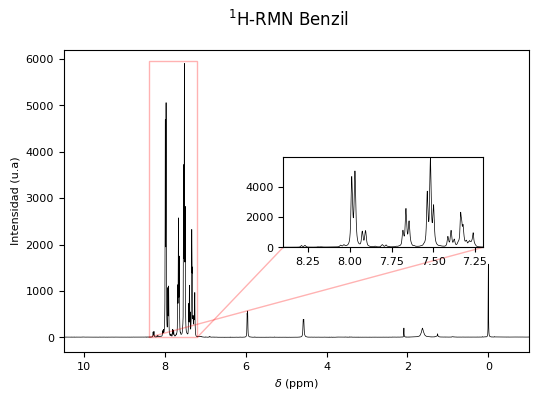

In [3]:
x, y = dataload("benzil.txt")
xlims = [(7.2, 8.4)]
ylims = [max(y)*1.01]

fig, ax = plotter(x, y, xlims, ylims, "$^1$H-RMN Benzil", x_coeff=5, y_coeff=2.5)
plt.show()
#fig.savefig("H-Benzil.png")

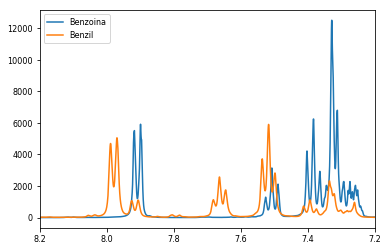

In [13]:
x1, y1 = dataload("benzoina.txt")
x2, y2 = dataload("benzil.txt")
fig, ax = plt.subplots()
ax.plot(x1, y1, label="Benzoina")
ax.plot(x2, y2, label="Benzil")
ax.set_xlim(7.2, 8.2)
ax.invert_xaxis()
ax.legend()
plt.show()
fig.savefig("both.png")